# Investigate simulations with individual soil column per pft  

Inlcuding regridding

(c) Inne Vanderkelen - October 2023

## 1. Settings

In [ ]:
# laod modules 
import xarray as xr
import matplotlib.pyplot as plt
import os
import regionmask 
import pandas as pd

# import own utils module
from iv_utils_daint import *
from ctsm_py.utils import * #info on ctsm utils: https://github.com/NCAR/ctsm_python_gallery 

# do plotting settings
set_plot_param()

# ignore all runtime warnings
warnings.filterwarnings('ignore')

In [ ]:
# directory settings

# set directories
outdir = '/scratch/snx3000/ivanderk/'

# Define directory where processing is done 
procdir =  outdir + 'processing_4p1000/' 

# go to processing directory 
os.chdir(procdir)

In [ ]:
# case settings

# define scenario
scenario = '4p1000'

# case settings
case_ctl = 'IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.CTL.spunup'
case_scen = 'IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.'+scenario+'.spunup'

case   = case_ctl
block  = 'lnd' 
stream = 'h1' 

# List of variables to import from file(s) in $indir matching $pattern.
variables = ['H2OSOI',"TOTSOILLIQ","TOTSOILICE", "QINFL" , "QOVER", "QDRAI", 'EFLX_LH_TOT',  "watsat","QROOTSINK" ,"QVEGE", "QVEGT","QSOIL",
             "watfc", "TSA" ] #"SOILPSI", "FPSN","QHR","SMP","GSSHA","GSSUN"

# discard 2004 until 2008 as spin up years
start_year, end_year = 1990, 2014 

time_slice = slice(str(start_year)+"-01-01", str(end_year)+"-12-31")

In [ ]:
## settings for plotting
ds_ctl =  load_case_ctl(['H2OSOI'])

# get mask and region ids
exclude_ids = np.array([0,1,2,16,28,29,30,31])
mask_regions = regionmask.defined_regions.ar6.land.mask(ds_ctl['H2OSOI'])

region_ids = np.arange(0,44)
region_ids = np.delete(region_ids, exclude_ids)

regions_sand_clay = [6, 7, 10, 11, 12, 14, 19, 21, 22, 23, 24, 26, 37, 38, 39, 41]

plotting_depth = 2 # m 8
figsize = (17,38)

In [ ]:
# get pfts modelled - bare soil, grassland and crop pfts
pft_list_crops = [15,16]
pft_list_grassland = [0,12,13,14]

### Load auxiliary data (soil levels, input dataset, wilting point etc) 

In [ ]:
# info on soil levels
# manually get soil level info from CLM
levsoi_thickness, levsoi_depth, levgrnd_thickness , levgrnd_depth = get_soildepths()

# get info on soil levels
levsoi = ds_ctl['levsoi'].values
levgrnd = ds_ctl['levgrnd'].values # all soil layers (deepest 5 layers are for thermodynamical calculations)

In [ ]:
# input data
# define variables to load from input dataset
input_variables = ['ORGANIC','PFTDATA_MASK','PCT_SAND','PCT_CLAY']

# load inputdata
ds_input, ds_input_scen, landmask = load_inputdata(scenario, input_variables, case_ctl)

In [ ]:
# get masks for sandy and clay soils

# define tresholds for pct sand and pct clay
pct_sand_threshold_min = 50
pct_sand_threshold_max = 85
pct_clay_threshold = 40
da_sand_mask, da_clay_mask = get_texture_masks(pct_sand_threshold_max,pct_sand_threshold_min,  pct_clay_threshold, ds_input, levsoi_thickness)

In [ ]:
# wilting point
# load precalculated wilting point datasets
da_wilting_h2osoi, da_wilting_h2osoi_scen = load_wilting_h2osoi(scenario) 

In [ ]:
# growing season mask
da_growingseason_mask = xr.open_dataset(procdir+'growing_season_mask.nc')['GS_MASK']

## Look at WB variables for cropland

In [11]:
df_wbterms_growingseason

NameError: name 'df_wbterms_growingseason' is not defined

In [ ]:
/scratch/snx3000/ivanderk/processing_4p1000/postprocessing/wbterm_delta_per_region_4p1000_15.non-growingseason.nc

In [34]:
pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(15)+'.'+'non-growingseason'+'.nc', index_col=0)

,3,4,5,6,7,8,9,10,11,12,...,34,35,36,37,38,39,40,41,42,43
QDRAI,-0.003000,-0.173578,-0.207720,-0.042992,0.125489,0.171549,-0.153014,-0.083120,-0.067081,-0.130620,...,-0.082688,-0.056339,-0.251378,0.004271,-0.019743,-0.076819,NaN,0.164794,-0.032170,0.277343
QINFL,8.336564,-0.165712,0.273643,0.161803,-0.079483,0.171317,-0.104689,0.379367,-0.104644,0.220390,...,0.007257,-0.094437,-0.088992,1.030452,0.917129,-0.061433,NaN,0.319913,0.063570,-0.706633
QOVER,-0.311759,-0.171477,-0.248165,0.276207,0.255999,0.080008,0.167615,0.032307,0.260524,0.250123,...,0.330345,-0.050456,0.424227,-0.027076,-0.027937,0.141807,NaN,-0.444716,-0.077082,-0.900534
SOILLIQ,0.063631,0.031452,0.009373,0.047114,0.128308,0.085972,0.081202,0.042890,0.078782,0.055327,...,0.052451,0.075866,0.030515,0.061832,0.051173,0.023700,NaN,0.050175,0.011634,0.100748
ET,0.492846,0.294064,0.504222,0.056006,0.141077,-0.134506,0.207578,0.113374,0.279435,0.340765,...,0.499955,0.269794,0.428009,0.026202,0.088536,0.198627,NaN,-0.771574,-0.017854,0.140966
QVEGE,-1.561638,0.130291,-0.366685,-0.062619,-0.094174,0.069552,-0.300779,-0.095500,-0.394062,-0.297742,...,-0.589001,-0.480585,-0.198334,0.065291,-0.033237,-0.228986,NaN,0.961738,-0.095631,0.399967
QVEGT,0.161432,0.279540,0.093921,0.208584,0.038662,0.125366,0.044198,0.018735,-0.078239,0.019877,...,-0.028013,0.136044,-0.078600,0.052804,0.019007,-0.039585,NaN,0.490860,0.096862,0.336016
QSOIL,0.836916,0.313775,1.230466,-0.138393,0.590882,-1.076105,1.189506,0.523576,1.275617,1.130435,...,1.377596,0.590482,1.010479,0.003244,0.433848,1.321333,NaN,-2.038991,-0.137414,-0.418760
QIRRIG_FROM_SURFACE,0.600195,0.682890,1.218492,0.091813,0.324624,-0.092785,0.336980,0.139110,0.306853,0.430869,...,0.578232,0.486701,0.423230,0.038588,0.172296,0.217800,NaN,-0.810615,-0.033809,0.490602


In [35]:
df_wbterms_non_growingseason

,3,4,5,6,7,8,9,10,11,12,...,34,35,36,37,38,39,40,41,42,43
QDRAI,-0.075742,-0.148841,-0.189971,-0.120543,0.034468,0.144302,-0.103387,-0.089271,-0.067738,-0.180467,...,-0.016214,-0.082559,-0.282530,0.065162,-0.024161,-0.152836,NaN,0.141307,-0.092450,-0.113010
QINFL,1.092073,-0.099736,-0.045628,0.061859,4.338192,1.276213,0.110924,4.887681,0.610281,1.051489,...,0.737265,0.099863,-0.082822,1.304999,1.381113,-0.050587,NaN,0.750899,0.091743,-0.057607
QOVER,0.298095,0.078188,-0.039346,0.072487,0.059828,0.113297,0.097324,-0.019396,0.006057,0.018773,...,-0.070016,-0.061159,0.362159,-0.085055,-0.034451,0.008256,NaN,-0.325603,-0.282771,-0.035591
SOILLIQ,0.064095,0.024968,0.004753,0.046742,0.122168,0.087935,0.080250,0.042944,0.084679,0.058846,...,0.063967,0.073457,0.030172,0.068199,0.050944,0.022144,NaN,0.051468,0.010264,0.087932
ET,0.285548,0.259966,0.233067,0.075941,0.054181,-0.071483,0.133906,0.057963,0.094049,0.137306,...,0.206136,0.134716,0.354083,-0.010034,0.046037,0.086840,NaN,-0.615959,-0.159616,0.212748
QVEGE,-0.191232,-0.225430,-0.422800,0.160827,0.021758,0.217126,-0.167391,-0.025218,-0.008295,-0.047840,...,0.185085,-0.185282,-0.142598,0.362456,-0.061026,-0.151718,NaN,0.359609,0.139653,-0.282913
QVEGT,0.061086,-0.003555,-0.028835,0.115481,0.056563,0.110884,0.050533,0.040799,0.000524,0.039953,...,0.052404,0.058777,-0.072632,0.158345,0.024686,-0.019421,NaN,0.481950,0.164501,0.086834
QSOIL,1.120660,1.083133,1.342051,-0.024348,0.063445,-1.011407,0.841985,0.220019,0.524291,0.549778,...,0.650975,0.581863,1.033722,-0.314323,0.242574,0.888738,NaN,-2.018809,-1.033243,1.546663
QIRRIG_FROM_SURFACE,0.375622,0.366755,0.402418,0.094939,0.258036,-0.063664,0.284470,0.056422,0.179387,0.299246,...,0.376818,0.264900,0.372093,-0.052150,0.032700,0.105532,NaN,-0.754511,-0.303831,0.304546


In [36]:
df_wbterms_growingseason = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+'growingseason'+'.nc', index_col=0)
df_wbterms_non_growingseason = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+'non-growingseason'+'.nc', index_col=0)


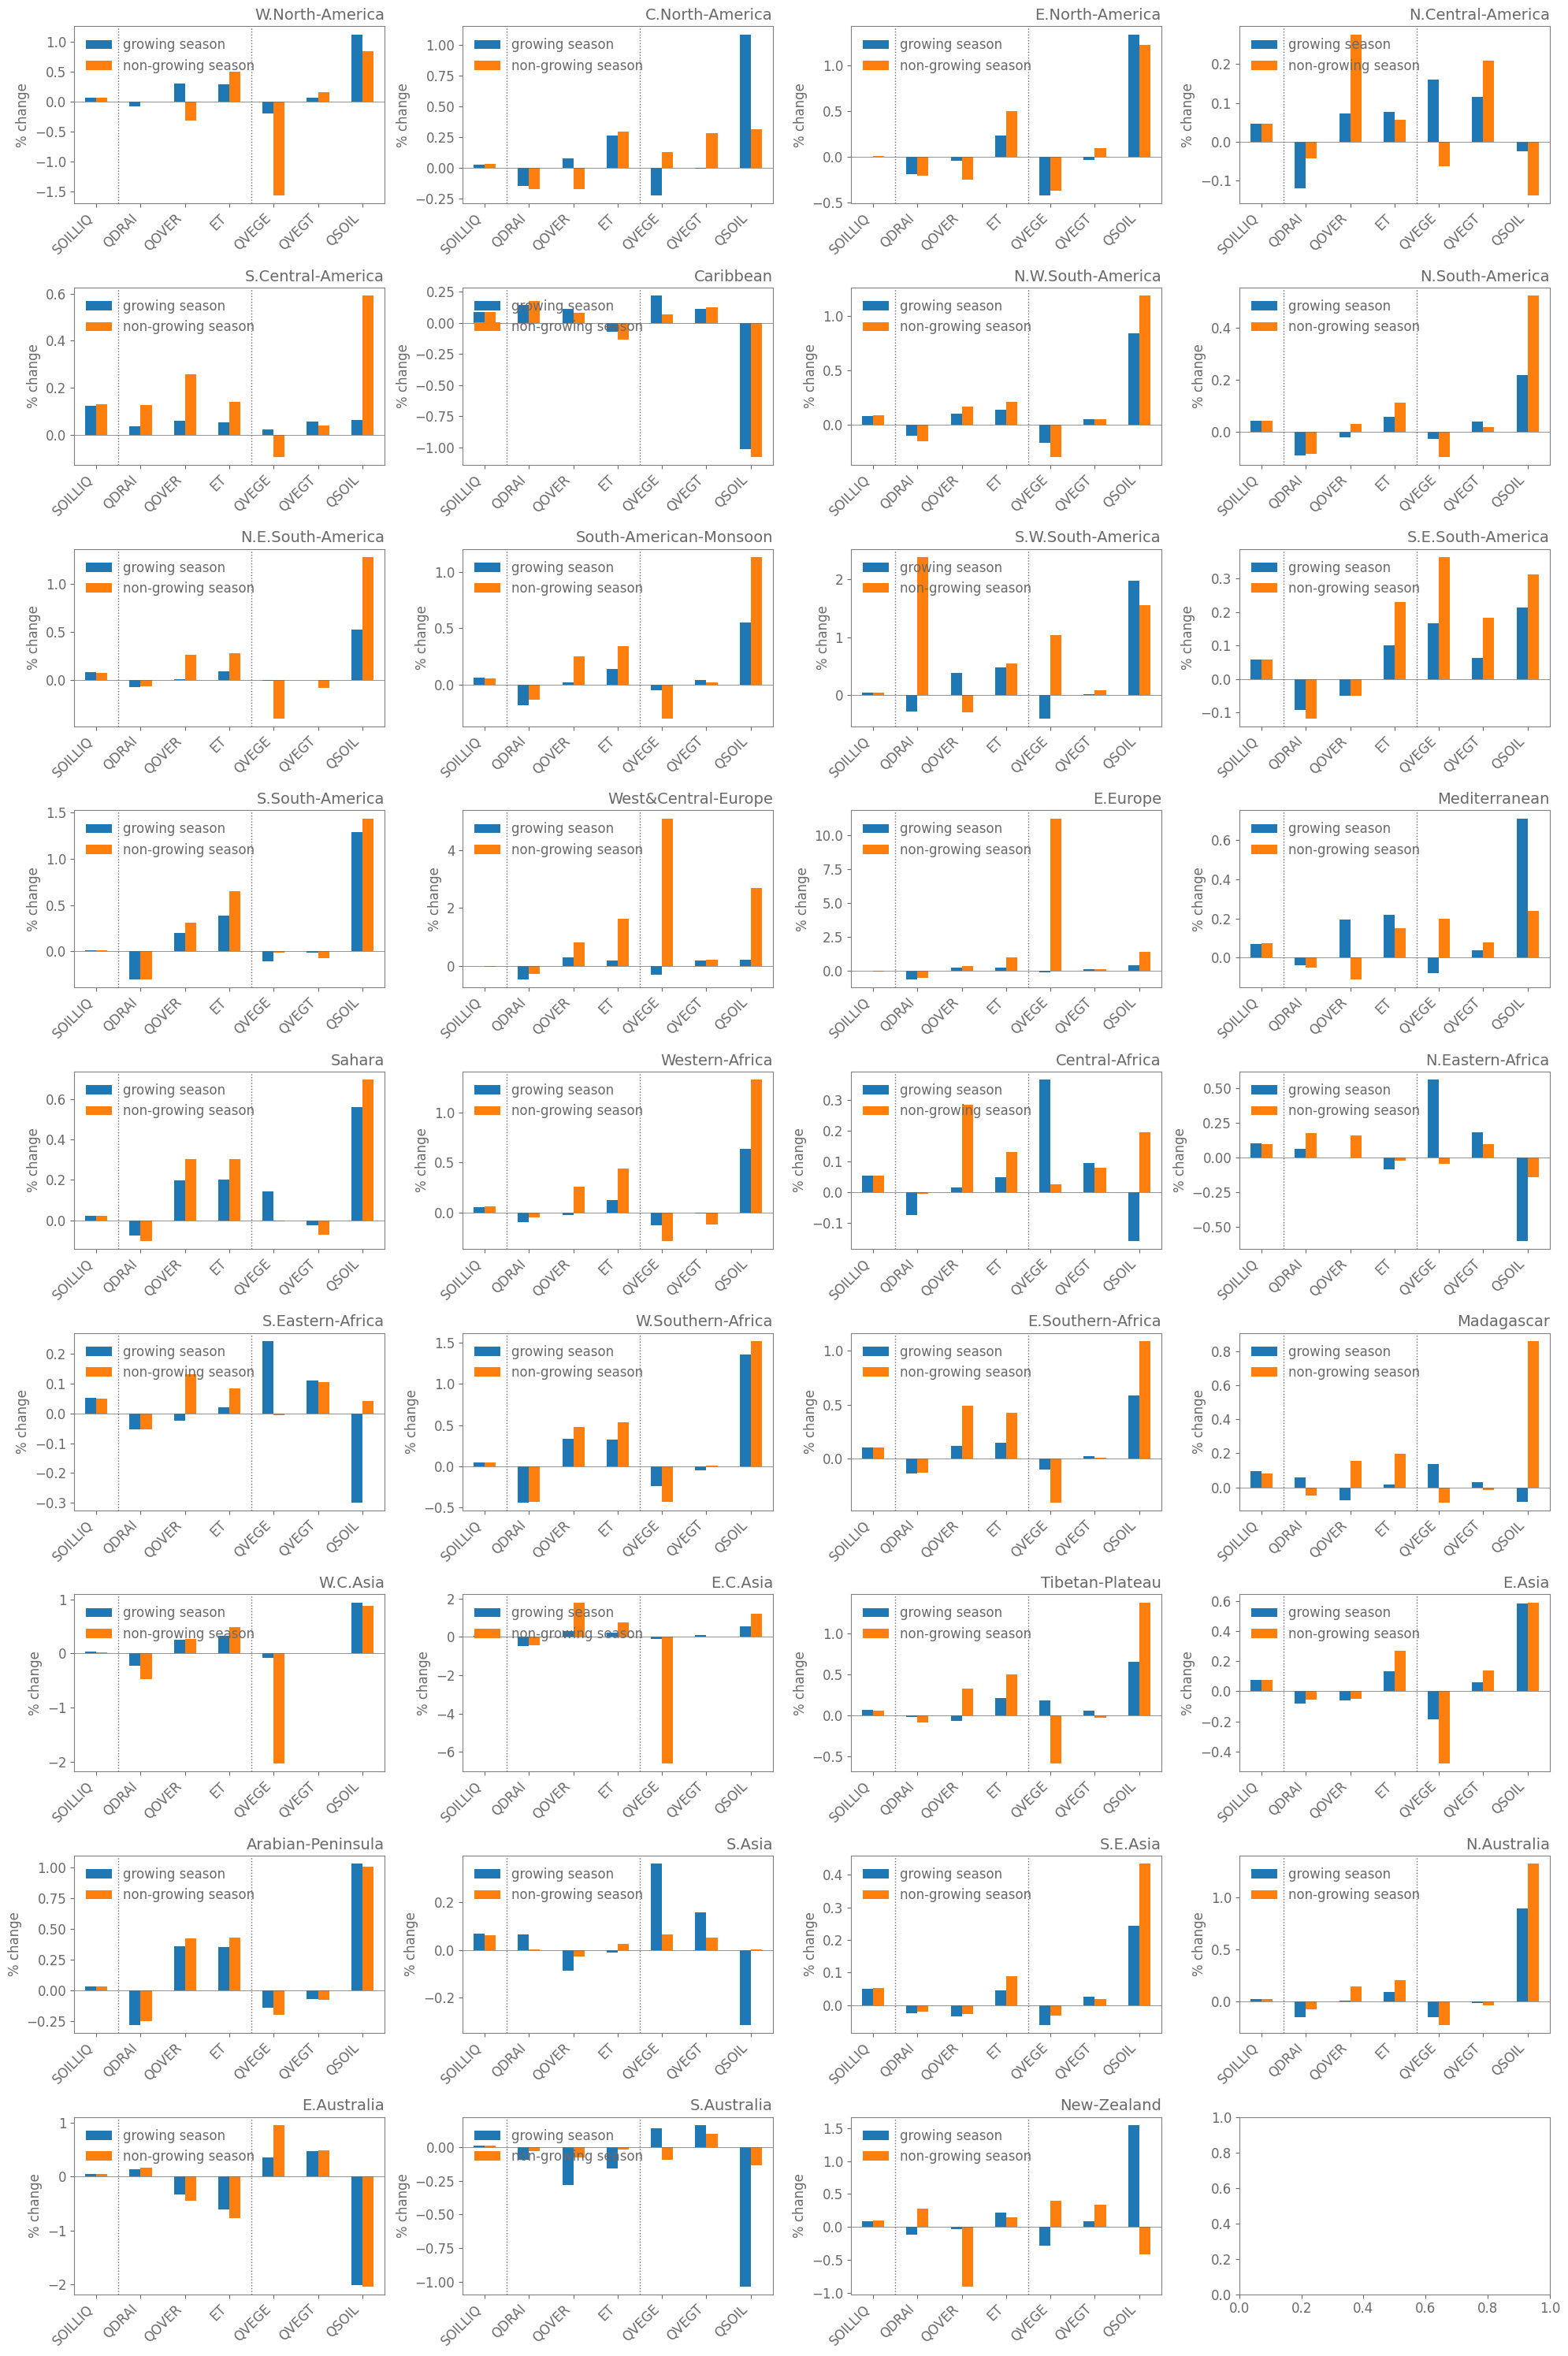

In [37]:
variables_wb_toplot = ['SOILLIQ','QDRAI', 'QOVER',  'ET', 'QVEGE', 'QVEGT', 'QSOIL']
figsize = (20,30)


pft_int = pft_list_crops[0]

df_wbterms_growingseason = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+'growingseason'+'.nc', index_col=0)
df_wbterms_non_growingseason = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+'non-growingseason'+'.nc', index_col=0)

region_ids_growingseason = list(map(int, df_wbterms_growingseason.loc[:, (df_wbterms_growingseason.notna().sum()>0)].keys().values))
region_ids_non_growingseason = list(map(int, df_wbterms_non_growingseason.loc[:, (df_wbterms_non_growingseason.notna().sum()>0)].keys().values))
ids_uniques = set(region_ids_non_growingseason + region_ids_growingseason )


fig, axes = plt.subplots(9,4,figsize=figsize)
axes = axes.flatten()

variables_wb = list(df_wbterms_growingseason.index)
x = np.arange(1,len(variables_wb)+1,1)

for i,region in enumerate(ids_uniques):
    
    
    df_wbterms_toplot = pd.DataFrame(df_wbterms_growingseason.loc[variables_wb_toplot, str(region)]).rename(columns={str(region):'growing season'})
    df_wbterms_toplot['non-growing season'] = df_wbterms_non_growingseason.loc[variables_wb_toplot, str(region)]

    region_name = regionmask.defined_regions.ar6.land[region].name
    region_abbrev = regionmask.defined_regions.ar6.land[region].abbrev

    ax = axes[i]
    
    df_wbterms_toplot.plot.bar(ax=ax, legend=True)

    ax.set_title(region_name,loc='right')
    ax.axhline(y=0, color='dimgray', linewidth=0.5)
    ax.axvline(x=0.5, color='dimgray', linewidth=1, linestyle = 'dotted')
    ax.axvline(x=3.5, color='dimgray', linewidth=1, linestyle = 'dotted')
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel('% change')

    ax.set_xticks(range(0,len(variables_wb_toplot)),list(variables_wb_toplot), rotation=45, ha='right')

fig.tight_layout()

## Growing season vs non-growing season

In [19]:
GS_text = 'non-growingseason'

GS_mask = -da_growingseason_mask

In [20]:
%%time 

flag_calc_wb = True

if flag_calc_wb:


    pft_list = [pft_list_crops[1]]

    variables_wb = ['QDRAI', 'QINFL', 'QOVER', 'TOTSOILLIQ', 'EFLX_LH_TOT',   "QVEGE", "QVEGT","QSOIL", 'QIRRIG_FROM_SURFACE']
    variables_wb_toplot = ['QDRAI', 'QINFL', 'QOVER', 'SOILLIQ', 'ET',  "QVEGE", "QVEGT","QSOIL",  'QIRRIG_FROM_SURFACE']

    d_wb_vars = {}


    for pft_int in pft_list: 
        for i,region in enumerate(region_ids):
            print(region)

            region_name = regionmask.defined_regions.ar6.land[region].name
            region_abbrev = regionmask.defined_regions.ar6.land[region].abbrev

            d_var_list = {}

            for variable,variable_toplot in zip(variables_wb,variables_wb_toplot): 
                print(variable)


                da_delta, da_delta_rel = calc_delta_and_rel_pft(case_ctl, case_scen, variable, pft_list)
                list_da_pft = []

                for pft_int in pft_list: 

                    list_da_pft.append(load_da_gridded_pft(variable, pft_int, case_ctl).rename(variable))

                da_ctl = xr.concat(list_da_pft, dim='ivt_str').rename({'ivt_str':'pft'})
                da_ctl['pft'] = pft_list

                mask = regionmask.defined_regions.ar6.land.mask(da_delta)

                da_delta_timmean = da_delta.where(GS_mask).mean('time')
                da_ctl_timmean = da_ctl.where(GS_mask).mean('time')

                da_ctl_seasmean_region = (da_delta_timmean.sel(pft=pft_int).where(mask==region).mean(dim=('lat','lon')) / da_ctl_timmean.sel(pft=pft_int).where(mask==region).mean(dim=('lat','lon'))).values*100

                d_var_list[variable_toplot]= da_ctl_seasmean_region

            d_wb_vars[str(region)] = pd.Series(d_var_list).to_frame(name=str(region))

        df_wbterms = pd.concat([v for k,v in d_wb_vars.items()],axis=1)
        df_wbterms.to_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+GS_text+'.nc')

else: 
    d_wbterms = {}
    for pft_int in pft_list: 
        d_wbterms[pft_int] = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+GS_text+'.nc', index_col=0)
    

3
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
4
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
5
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
6
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
7
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
8
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
9
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
10
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
11
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
12
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
13
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
14
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
15
QDRAI
QINFL
QOVER
TO

In [15]:
%%time 

flag_calc_wb = True

if flag_calc_wb:


    pft_list = pft_list_crops

    variables_wb = ['QDRAI', 'QINFL', 'QOVER', 'TOTSOILLIQ', 'EFLX_LH_TOT',   "QVEGE", "QVEGT","QSOIL", 'QIRRIG_FROM_SURFACE']
    variables_wb_toplot = ['QDRAI', 'QINFL', 'QOVER', 'SOILLIQ', 'ET',  "QVEGE", "QVEGT","QSOIL",  'QIRRIG_FROM_SURFACE']

    d_wb_vars = {}


    for pft_int in pft_list: 
        for i,region in enumerate(region_ids):
            print(region)

            region_name = regionmask.defined_regions.ar6.land[region].name
            region_abbrev = regionmask.defined_regions.ar6.land[region].abbrev

            d_var_list = {}

            for variable,variable_toplot in zip(variables_wb,variables_wb_toplot): 
                print(variable)


                da_delta, da_delta_rel = calc_delta_and_rel_pft(case_ctl, case_scen, variable, pft_list)
                list_da_pft = []

                for pft_int in pft_list: 

                    list_da_pft.append(load_da_gridded_pft(variable, pft_int, case_ctl).rename(variable))

                da_ctl = xr.concat(list_da_pft, dim='ivt_str').rename({'ivt_str':'pft'})
                da_ctl['pft'] = pft_list

                mask = regionmask.defined_regions.ar6.land.mask(da_delta)

                da_delta_timmean = da_delta.where(GS_mask).mean('time')
                da_ctl_timmean = da_ctl.where(GS_mask).mean('time')

                da_ctl_seasmean_region = (da_delta_timmean.sel(pft=pft_int).where(mask==region).mean(dim=('lat','lon')) / da_ctl_timmean.sel(pft=pft_int).where(mask==region).mean(dim=('lat','lon'))).values*100

                d_var_list[variable_toplot]= da_ctl_seasmean_region

            d_wb_vars[str(region)] = pd.Series(d_var_list).to_frame(name=str(region))

        df_wbterms = pd.concat([v for k,v in d_wb_vars.items()],axis=1)
        df_wbterms.to_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+GS_text+'.nc')

else: 
    d_wbterms = {}
    for pft_int in pft_list: 
        d_wbterms[pft_int] = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+GS_text+'.nc', index_col=0)
    

3
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
4
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
5
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
6
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
7
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
8
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
9
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
10
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
11
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
12
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
13
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
14
QDRAI
QINFL
QOVER
TOTSOILLIQ
EFLX_LH_TOT
QVEGE
QVEGT
QSOIL
QIRRIG_FROM_SURFACE
15
QDRAI
QINFL
QOVER
TO

KeyboardInterrupt: 

## sandy soils

In [ ]:
texture_mask = da_sand_mask.compute()
texture_name = texture_mask.name

In [12]:
%%time 

flag_calc_wb = True

if flag_calc_wb:


    pft_list = pft_list_crops

    variables_wb = ['QDRAI', 'QINFL', 'QOVER', 'TOTSOILLIQ', 'EFLX_LH_TOT',   "QVEGE", "QVEGT","QSOIL", 'QIRRIG_FROM_SURFACE']
    variables_wb_toplot = ['QDRAI', 'QINFL', 'QOVER', 'SOILLIQ', 'ET',  "QVEGE", "QVEGT","QSOIL",  'QIRRIG_FROM_SURFACE']

    d_wb_vars = {}


    for pft_int in pft_list: 
        for i,region in enumerate(region_ids):
            print(region)

            region_name = regionmask.defined_regions.ar6.land[region].name
            region_abbrev = regionmask.defined_regions.ar6.land[region].abbrev

            d_var_list = {}

            for variable,variable_toplot in zip(variables_wb,variables_wb_toplot): 
                print(variable)


                da_delta, da_delta_rel = calc_delta_and_rel_pft(case_ctl, case_scen, variable, pft_list)
                list_da_pft = []

                for pft_int in pft_list: 

                    list_da_pft.append(load_da_gridded_pft(variable, pft_int, case_ctl).rename(variable))

                da_ctl = xr.concat(list_da_pft, dim='ivt_str').rename({'ivt_str':'pft'})
                da_ctl['pft'] = pft_list

                mask = regionmask.defined_regions.ar6.land.mask(da_delta)

                da_delta_timmean = (da_delta).mean('time').where(texture_mask) 
                da_ctl_timmean = da_ctl.mean('time').where(texture_mask)

                da_ctl_seasmean_region = (da_delta_timmean.sel(pft=pft_int).where(mask==region).mean(dim=('lat','lon')) / da_ctl_timmean.sel(pft=pft_int).where(mask==region).mean(dim=('lat','lon'))).values*100

                d_var_list[variable_toplot]= da_ctl_seasmean_region

            d_wb_vars[str(region)] = pd.Series(d_var_list).to_frame(name=str(region))

        df_wbterms = pd.concat([v for k,v in d_wb_vars.items()],axis=1)
        df_wbterms.to_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+texture_name+'.nc')

else: 
    d_wbterms = {}
    for pft_int in pft_list: 
        d_wbterms[pft_int] = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+texture_name+'.nc', index_col=0)
    

CPU times: user 2.75 ms, sys: 6.21 ms, total: 8.96 ms
Wall time: 53.2 ms


## CLAY

In [13]:
texture_mask = da_clay_mask.compute()
texture_name = texture_mask.name

In [15]:
df_wbterms.rename(index={'QDRAI':'TSA'},inplace=True)
df_wbterms_tsa = df_wbterms

In [18]:
df_wbterms = d_wbterms[15]

In [22]:
df_wbterms_new = pd.concat([df_wbterms,df_wbterms_tsa])

In [24]:
df_wbterms_new.to_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(15)+'.'+texture_name+'.nc')

In [17]:
%%time 

flag_calc_wb = False

if flag_calc_wb:


    pft_list = pft_list_crops

    variables_wb = ['QDRAI', 'QINFL', 'QOVER', 'TOTSOILLIQ', 'EFLX_LH_TOT',   "QVEGE", "QVEGT","QSOIL" , 'QIRRIG_FROM_SURFACE', "TSA"]
    variables_wb = ["TSA"]

    variables_wb_toplot = ['QDRAI', 'QINFL', 'QOVER', 'SOILLIQ', 'ET',  "QVEGE", "QVEGT","QSOIL",  'QIRRIG_FROM_SURFACE', "TSA"]

    d_wb_vars = {}


    for pft_int in pft_list: 
        for i,region in enumerate(region_ids):
            print(region)

            region_name = regionmask.defined_regions.ar6.land[region].name
            region_abbrev = regionmask.defined_regions.ar6.land[region].abbrev

            d_var_list = {}

            for variable,variable_toplot in zip(variables_wb,variables_wb_toplot): 
                print(variable)


                da_delta, da_delta_rel = calc_delta_and_rel_pft(case_ctl, case_scen, variable, pft_list)
                list_da_pft = []

                for pft_int in pft_list: 

                    list_da_pft.append(load_da_gridded_pft(variable, pft_int, case_ctl).rename(variable))

                da_ctl = xr.concat(list_da_pft, dim='ivt_str').rename({'ivt_str':'pft'})
                da_ctl['pft'] = pft_list

                mask = regionmask.defined_regions.ar6.land.mask(da_delta)

                da_delta_timmean = (da_delta).mean('time').where(texture_mask) 
                da_ctl_timmean = da_ctl.mean('time').where(texture_mask)

                da_ctl_seasmean_region = (da_delta_timmean.sel(pft=pft_int).where(mask==region).mean(dim=('lat','lon')) / da_ctl_timmean.sel(pft=pft_int).where(mask==region).mean(dim=('lat','lon'))).values*100

                d_var_list[variable_toplot]= da_ctl_seasmean_region

            d_wb_vars[str(region)] = pd.Series(d_var_list).to_frame(name=str(region))

            df_wbterms = pd.concat([v for k,v in d_wb_vars.items()],axis=1)
            #df_wbterms.to_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+texture_name+'.nc')

else: 
    d_wbterms = {}
    for pft_int in pft_list: 
        d_wbterms[pft_int] = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.'+texture_name+'.nc', index_col=0)
    

CPU times: user 8.79 ms, sys: 964 µs, total: 9.76 ms
Wall time: 224 ms


NameError: name 'df_wbterms' is not defined

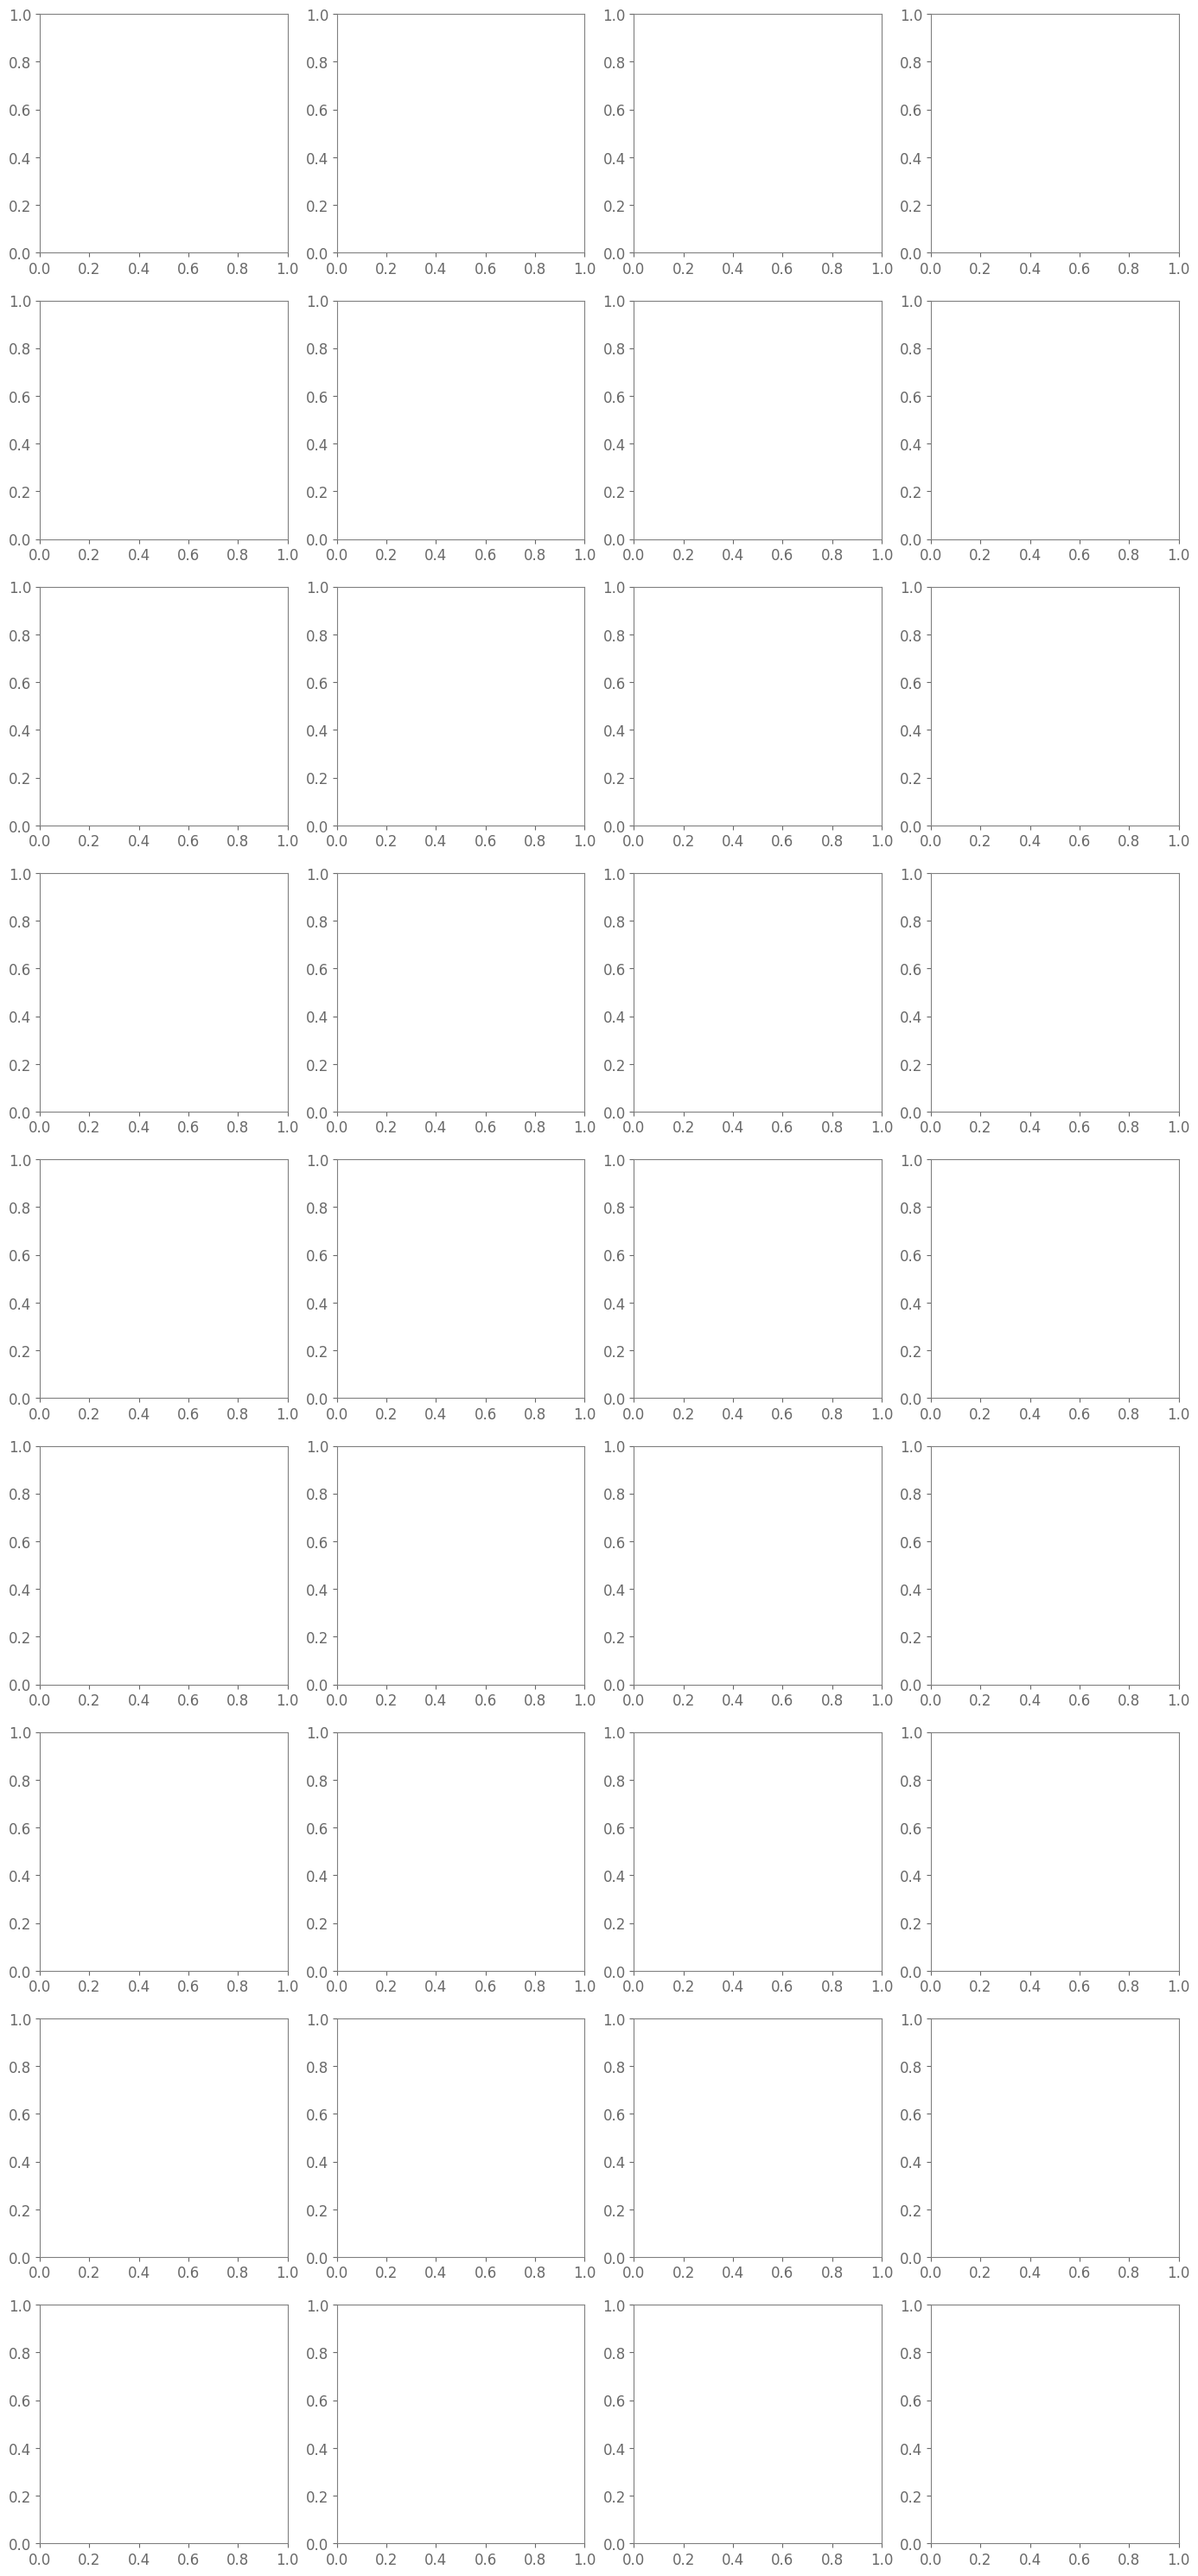

In [24]:
variables_wb_toplot = ['SOILLIQ','QDRAI', 'QOVER',  'ET', 'QVEGE', 'QVEGT', 'QSOIL']

pft_int = pft_list_crops[0]
fig, axes = plt.subplots(9,4,figsize=figsize)
axes = axes.flatten()

variables_wb = list(df_wbterms.index)
x = np.arange(1,len(variables_wb)+1,1)

for i,region in enumerate(region_ids):
    
    region_name = regionmask.defined_regions.ar6.land[region].name
    region_abbrev = regionmask.defined_regions.ar6.land[region].abbrev

    ax = axes[i]
    df_wbterms.loc[variables_wb_toplot, str(region)].plot.bar(ax=ax, legend=False)
    ax.set_title(region_name,loc='right')
    ax.axhline(y=0, color='dimgray', linewidth=0.5)
    ax.axvline(x=0.5, color='dimgray', linewidth=1, linestyle = 'dotted')
    ax.axvline(x=3.5, color='dimgray', linewidth=1, linestyle = 'dotted')

    ax.set_ylabel('% change')

    ax.set_xticks(range(0,len(variables_wb_toplot)),list(variables_wb_toplot), rotation=45, ha='right')

fig.tight_layout()

## Clay and sand together

### NOT IRRIGATED

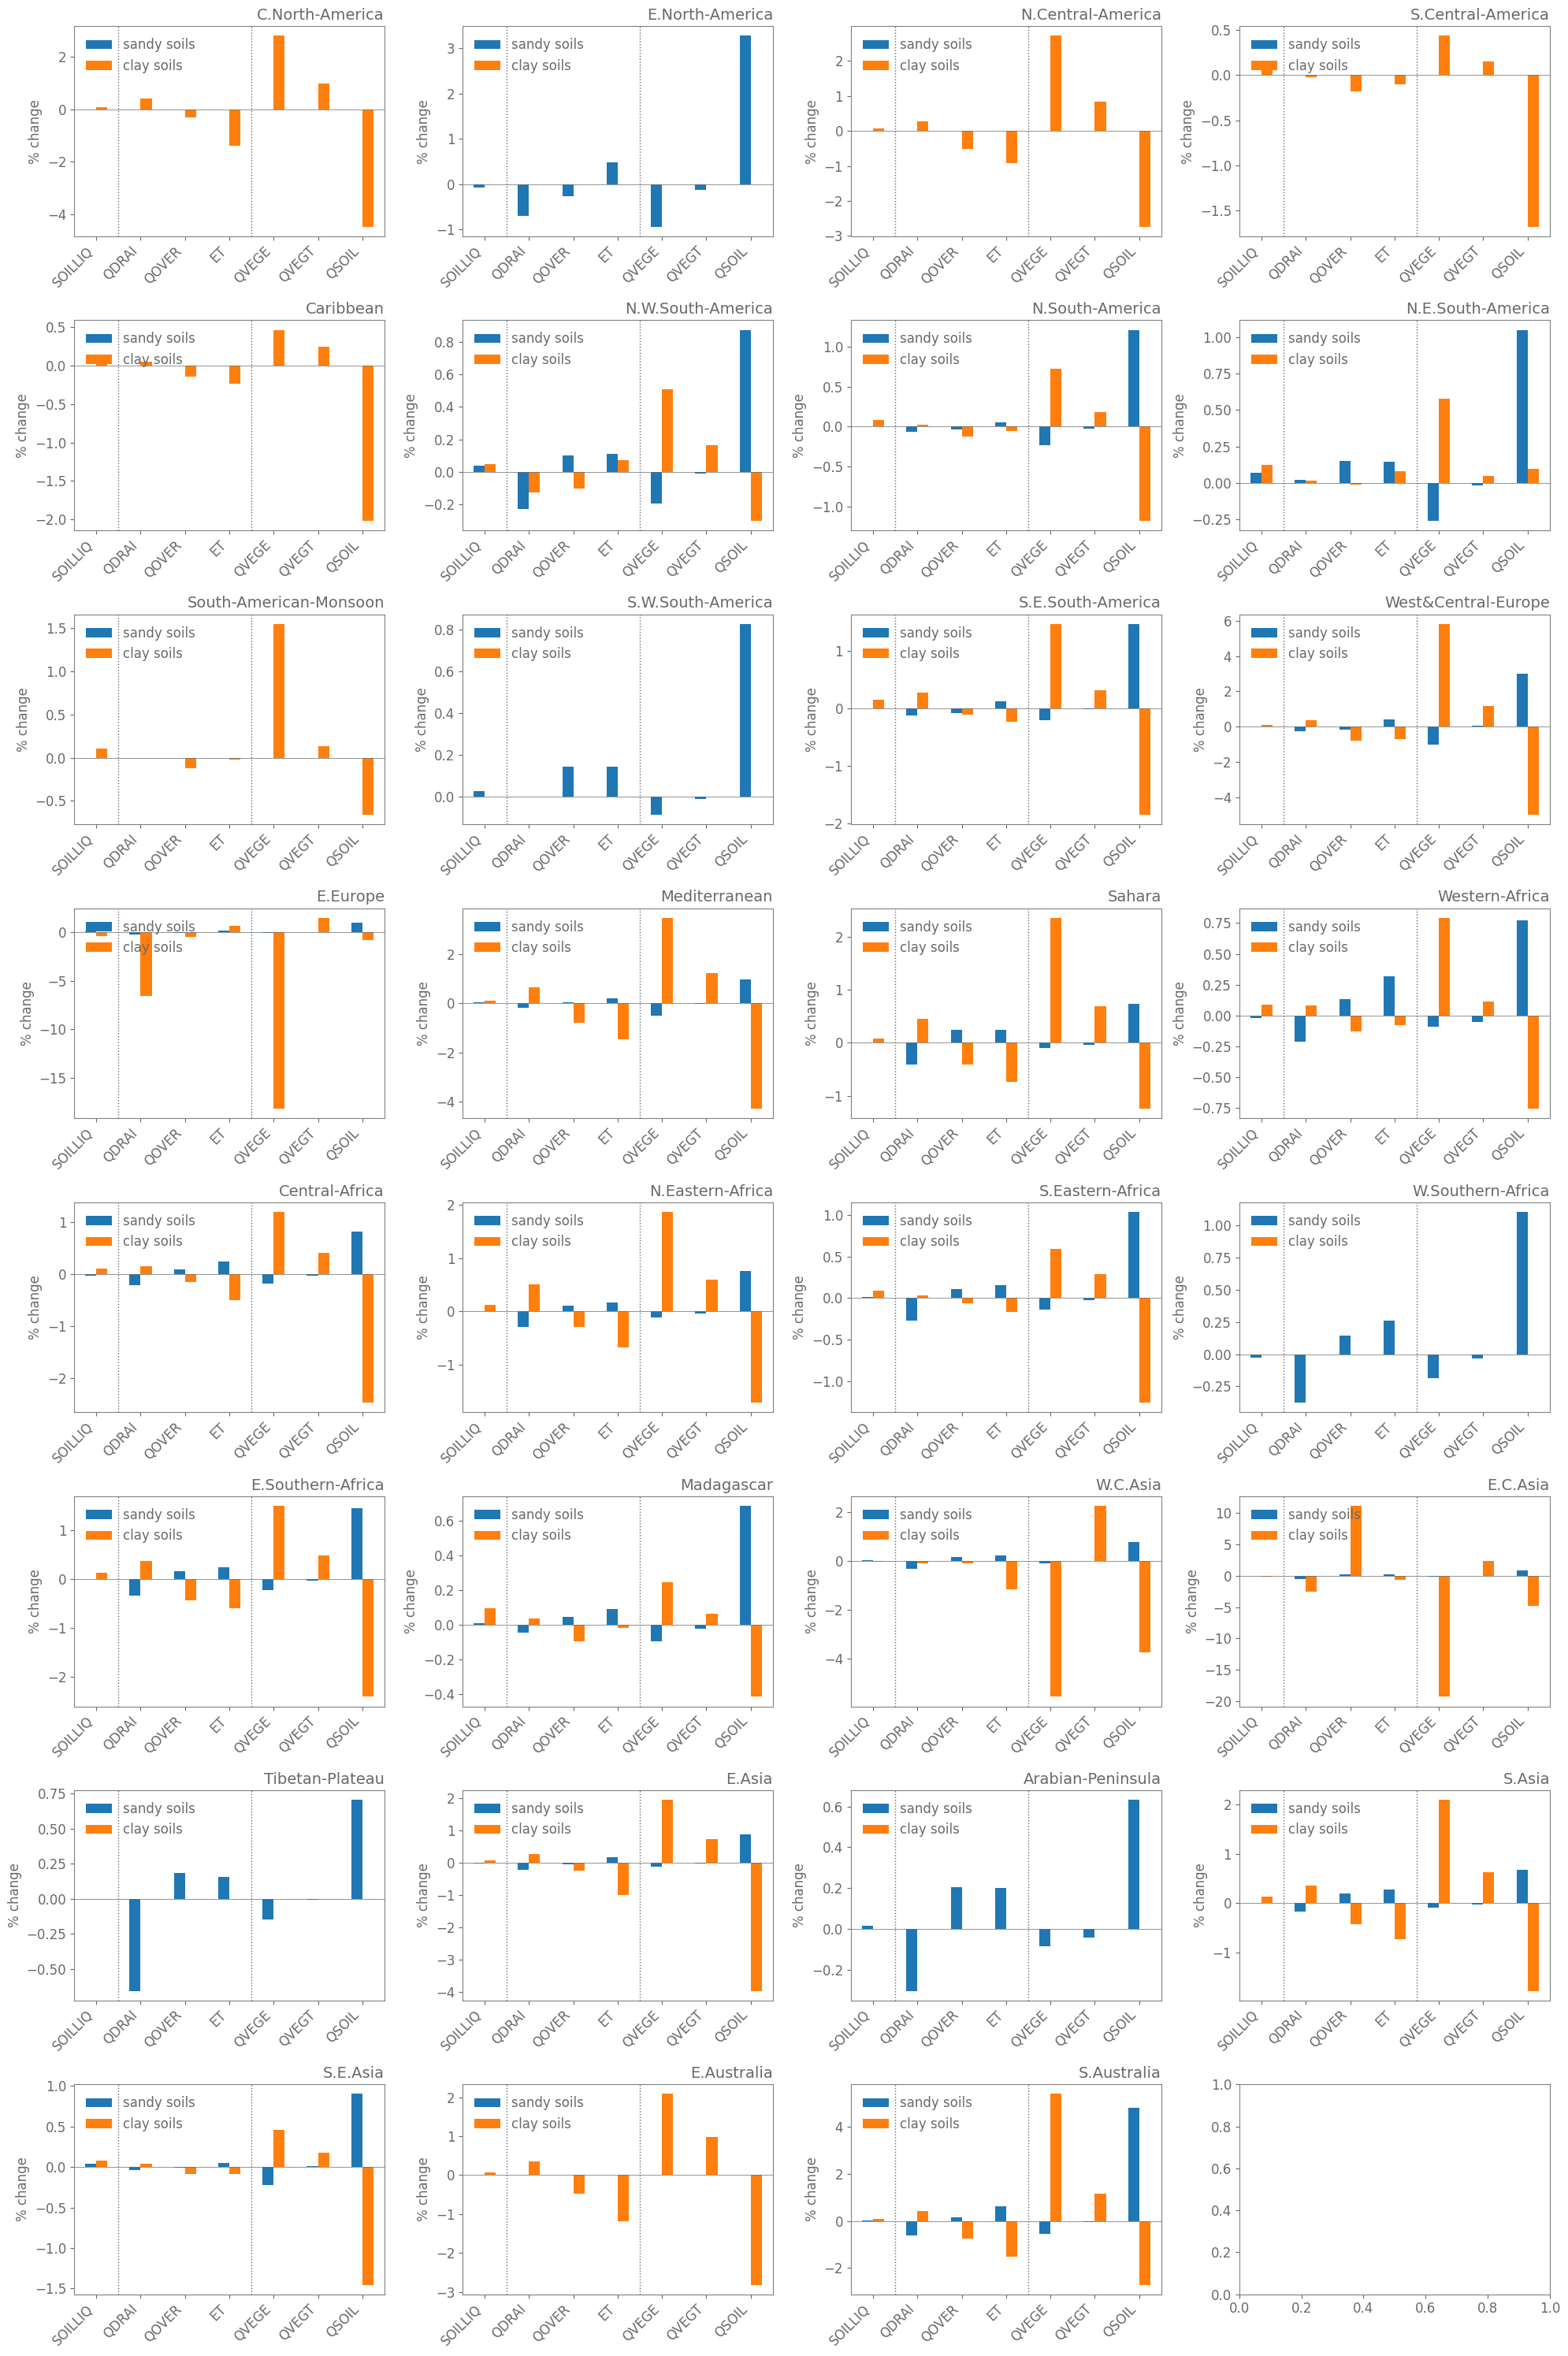

In [13]:
variables_wb_toplot = ['SOILLIQ','QDRAI', 'QOVER',  'ET', 'QVEGE', 'QVEGT', 'QSOIL']
figsize = (20,30)


pft_int = pft_list_crops[0]

df_wbterms_sand = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.PCT_SAND.nc', index_col=0)
df_wbterms_clay = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.PCT_CLAY.nc', index_col=0)

region_ids_sand = list(map(int, df_wbterms_sand.loc[:, (df_wbterms_sand.notna().sum()>0)].keys().values))
region_ids_clay = list(map(int, df_wbterms_clay.loc[:, (df_wbterms_clay.notna().sum()>0)].keys().values))
ids_uniques = set(region_ids_clay + region_ids_sand )


fig, axes = plt.subplots(8,4,figsize=figsize)
axes = axes.flatten()

variables_wb = list(df_wbterms_sand.index)
x = np.arange(1,len(variables_wb)+1,1)

for i,region in enumerate(ids_uniques):
    
    
    df_wbterms_toplot = pd.DataFrame(df_wbterms_sand.loc[variables_wb_toplot, str(region)]).rename(columns={str(region):'sandy soils'})
    df_wbterms_toplot['clay soils'] = df_wbterms_clay.loc[variables_wb_toplot, str(region)]

    region_name = regionmask.defined_regions.ar6.land[region].name
    region_abbrev = regionmask.defined_regions.ar6.land[region].abbrev

    ax = axes[i]
    
    df_wbterms_toplot.plot.bar(ax=ax, legend=True)

    ax.set_title(region_name,loc='right')
    ax.axhline(y=0, color='dimgray', linewidth=0.5)
    ax.axvline(x=0.5, color='dimgray', linewidth=1, linestyle = 'dotted')
    ax.axvline(x=3.5, color='dimgray', linewidth=1, linestyle = 'dotted')
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel('% change')

    ax.set_xticks(range(0,len(variables_wb_toplot)),list(variables_wb_toplot), rotation=45, ha='right')

fig.tight_layout()

### IRRIGATED

In [ ]:
variables_wb_toplot = ['SOILLIQ','QDRAI', 'QOVER',  'ET', 'QVEGE', 'QVEGT', 'QSOIL', 'QIRRIG_FROM_SURFACE']
variables_wb_labels = ['SOILLIQ','QDRAI', 'QOVER',  'ET', 'QVEGE', 'QVEGT', 'QSOIL', 'QIRRIG']
figsize = (20,30)


pft_int = pft_list_crops[1]

df_wbterms_sand = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.PCT_SAND.nc', index_col=0)
df_wbterms_clay = pd.read_csv(procdir+'postprocessing/wbterm_delta_per_region_'+scenario+'_'+str(pft_int)+'.PCT_CLAY.nc', index_col=0)

region_ids_sand = list(map(int, df_wbterms_sand.loc[:, (df_wbterms_sand.notna().sum()>0)].keys().values))
region_ids_clay = list(map(int, df_wbterms_clay.loc[:, (df_wbterms_clay.notna().sum()>0)].keys().values))
ids_uniques = set(region_ids_clay + region_ids_sand )


fig, axes = plt.subplots(8,4,figsize=figsize)
axes = axes.flatten()

variables_wb = list(df_wbterms_sand.index)
x = np.arange(1,len(variables_wb)+1,1)

for i,region in enumerate(ids_uniques):
    
    
    df_wbterms_toplot = pd.DataFrame(df_wbterms_sand.loc[variables_wb_toplot, str(region)]).rename(columns={str(region):'sandy soils'})
    df_wbterms_toplot['clay soils'] = df_wbterms_clay.loc[variables_wb_toplot, str(region)]

    region_name = regionmask.defined_regions.ar6.land[region].name
    region_abbrev = regionmask.defined_regions.ar6.land[region].abbrev

    ax = axes[i]
    
    df_wbterms_toplot.plot.bar(ax=ax, legend=True)

    ax.set_title(region_name,loc='right')
    ax.axhline(y=0, color='dimgray', linewidth=0.5)
    ax.axvline(x=0.5, color='dimgray', linewidth=1, linestyle = 'dotted')
    ax.axvline(x=3.5, color='dimgray', linewidth=1, linestyle = 'dotted')
    ax.axvline(x=6.5, color='dimgray', linewidth=1, linestyle = 'dotted')

    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel('% change')

    ax.set_xticks(range(0,len(variables_wb_toplot)),list(variables_wb_labels), rotation=45, ha='right')

fig.tight_layout()